# Linear Regression Playground

### Goal: explore the following via intentional practice:

*1.0 Modelling Approaches:*
* Linear regression from scratch using Numpy (single variable + Gradient Descent) [Viz GD + Error Surface]
* Linear regression from scratch using Numpy (Multiple variables + Gradient Descent)
* Linear regression from scratch using Numpy (Multiple variables + Polynomials + Gradient Descent)
* Linear regression using the Normal equation (Chesky, QR) [**DONE**]
* Linear regression using SKlearn [**DONE**]
* Explore multiple Algo options (e.g. Least Squares, Chesky etc.)
* Repeat all of the above for (multi-variable, polynomial, learning rates, batch,

*2.0 Playground:*
* Explore the effect of different learning rates
* Explore the effect of not scaling features (choose extreme example)
* Explore the effect of outliers on model performance
* Explore the use of batch, stochastic and min-batch (run times, convergence, error rates) (Numpy + scikit learn)
* Explore the effect of regularization on the model
* Memory, runtime and complexity -> Computational linear algebra (increase number of examples)

*3.0 Package Library Explorer:*
* Do working example with Scikit learn, Tensorflow, Pytorch, Keras
* Read and understand their documentation + how modules/classes are packaged
* Playaround with features explored above (learning rate, algo, regularization etc.)



## 1.0 Modelling Approaches

### 1.1 Prepare Data

In [39]:
#import packages
import numpy as np
import matplotlib.pyplot as plt

In [86]:
#create artificial dataset for experimentation

X = 2* np.random.rand(100,1) #100x1 shape...random numbers from normal distribution
y= 4 + 3*X + np.random.rand(100,1)

#Add one column to x for incercept
X_ones = np.c_[np.ones((100,1)), X]
m=len(X)

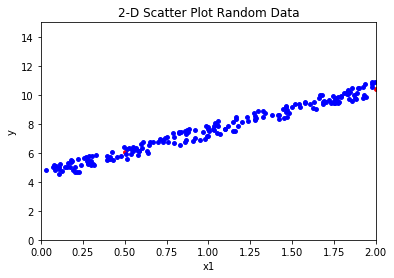

In [58]:
#plot the data
colors = ("blue")
plt.scatter(X, y, c=colors,s=15)
plt.title('2-D Scatter Plot Random Data')
plt.xlabel('x1')
plt.ylabel('y')
plt.axis([0,2,0,15])
plt.show()

### 1.2 Normal Equations (1 Variable)

In [61]:
from numpy.linalg import inv

theta = np.linalg.inv(X_ones.T.dot(X_ones)).dot(X_ones.T).dot(y)

In [107]:
theta

array([[4.53556035],
       [2.99078222]])

In [62]:
#Not a bad result....we were hoping for Theta0=4 and Theta1=3. The noise made it impossible to get it bang on

In [63]:
#Now lets make preductions with theta

In [75]:
X_test=np.array([[0.5],[2],[1]])

In [78]:
#Add one column to x for incercept
X_test_ones = np.c_[np.ones((3,1)), X_test]

In [79]:
X_test_ones

array([[1. , 0.5],
       [1. , 2. ],
       [1. , 1. ]])

In [80]:
y_predict=X_test_ones.dot(theta)

In [81]:
y_predict

array([[ 6.03095146],
       [10.51712479],
       [ 7.52634257]])

In [82]:
#Lets plot the models predictions in a new color

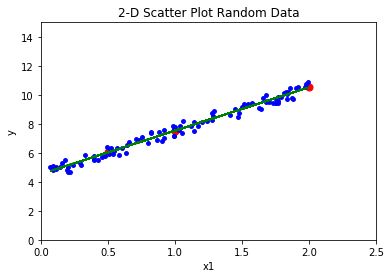

In [83]:
#plot the data
colors = ("red")
plt.scatter(X_test, y_predict, c="red",s=50)
plt.scatter(X, y, c="blue",s=15)
plt.plot(X, np.dot(X_ones, theta), label='Linear Reg Normal Eqn', color='green')

plt.title('2-D Scatter Plot Random Data')
plt.xlabel('x1')
plt.ylabel('y')
plt.axis([0,2.5,0,15])
plt.show()

In [84]:
#what is the mean square error using the NEqn (good to compare to others)

In [98]:
dt=np.dot(X_ones,theta)-y
cost=np.dot(dt.T,dt)/2/m
cost

array([[0.04474208]])

In [ ]:
#Try and calculate the R^2 error based on Sklearn implementation

In [125]:
u=np.dot(dt.T,dt)
y_mean=np.mean(y)
dz=(y-y_mean)
v=np.dot(dz.T,dz)
r_squared=(1-u/v)
r_squared


array([[0.96625878]])

### 1.3 Sci-Kit Learn Implementation (1 Variable)

In [99]:
from sklearn.linear_model import LinearRegression

In [114]:
reg = LinearRegression()

In [115]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
reg.coef_

array([[2.88018718]])

In [117]:
reg.intercept_ 

array([4.64487362])

In [118]:
reg.predict(np.array([[0.5],[2],[1]]))

array([[ 6.08496721],
       [10.40524799],
       [ 7.5250608 ]])

In [123]:
predicted_line=reg.predict(X)

In [119]:
reg.score(X, y)

0.9676857083480109

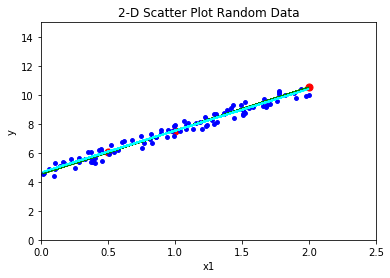

In [124]:
#plot the data
colors = ("red")
plt.scatter(X_test, y_predict, c="red",s=50)
plt.scatter(X, y, c="blue",s=15)
plt.plot(X, np.dot(X_ones, theta), label='Linear Reg Normal Eqn', color='green')
plt.plot(X, predicted_line , label='Linear Reg SkLearn', color='cyan')


plt.title('2-D Scatter Plot Random Data')
plt.xlabel('x1')
plt.ylabel('y')
plt.axis([0,2.5,0,15])
plt.show()

### 1.4 Gradient Descent Implementation